In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import warnings
warnings.filterwarnings("ignore")
import logging
logging.basicConfig(level=logging.ERROR)

In [5]:
# Cargamos las nuevas imágenes de símbolos
def load_images_from_folder(folder, img_size=(64, 64)):
    images = []
    labels = []
    for label_folder in os.listdir(folder):
        label_path = os.path.join(folder, label_folder)
        if os.path.isdir(label_path):
            for filename in os.listdir(label_path):
                img_path = os.path.join(label_path, filename)
                img = Image.open(img_path).convert('L')  # Escala de grises
                img = img.resize(img_size)  # Redimensionar a un tamaño mayor
                img = np.array(img) / 255.0  # Normalizar
                images.append(img)
                labels.append(label_folder)
    return np.array(images).reshape(-1, img_size[0], img_size[1], 1), np.array(labels)

In [6]:
# Cargar imágenes de tu nueva carpeta
images, labels = load_images_from_folder(r"C:/Users/tomif/Desktop/AI calculadora/extracted_images", img_size=(64, 64))

In [8]:
# Convertir etiquetas de texto a números
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [9]:
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

In [14]:
# Crear un nuevo modelo con más filtros y capas
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),  # Imagen de 64x64 píxeles
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(set(labels)), activation='softmax')  # Ajustar el número de clases
    ])

In [15]:
# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Entrena el modelo
model.fit(images, labels_encoded, epochs=5)

Epoch 1/5
11750/11750 ━━━━━━━━━━━━━━━━━━━━ 322s 27ms/step - accuracy: 0.8189 - loss: 0.7067
Epoch 2/5
11750/11750 ━━━━━━━━━━━━━━━━━━━━ 307s 26ms/step - accuracy: 0.9489 - loss: 0.1649
Epoch 3/5
11750/11750 ━━━━━━━━━━━━━━━━━━━━ 310s 26ms/step - accuracy: 0.9661 - loss: 0.1053
Epoch 4/5
11750/11750 ━━━━━━━━━━━━━━━━━━━━ 295s 25ms/step - accuracy: 0.9746 - loss: 0.0771
Epoch 5/5
11750/11750 ━━━━━━━━━━━━━━━━━━━━ 293s 25ms/step - accuracy: 0.9791 - loss: 0.0633


In [17]:
# Guardar el modelo completo
# model.save('ruta_a_tu_modelo/modelo_completo.h5')

In [18]:
def load_test_image(image_path, img_size=(64, 64)):
    img = Image.open(image_path).convert('L')  # Escala de grises
    img = img.resize(img_size)  # Redimensionar a 64x64 píxeles
    img = np.array(img) / 255.0  # Normalizar
    return img.reshape(1, img_size[0], img_size[1], 1)  # Añadir batch dimension

In [62]:
# Hacer predicción
test_image = load_test_image(r"C:/Users/tomif/Desktop/AI calculadora/extracted_images/9/9_61968.jpg")
prediction = model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [63]:
# Obtener la clase predicha
predicted_label = np.argmax(prediction)

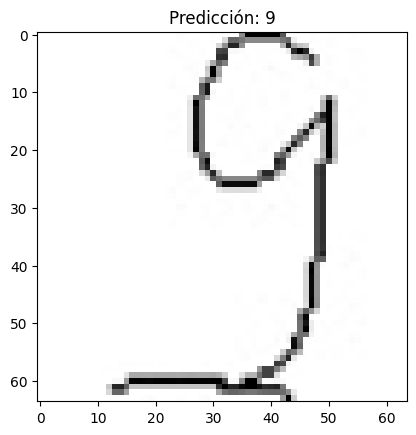

In [64]:
# Mostrar la imagen de prueba y la predicción
plt.imshow(test_image[0], cmap='gray')
plt.title(f"Predicción: {label_encoder.inverse_transform([predicted_label])[0]}")
plt.show()

In [65]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 82)             │        10,578 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,079,608 (7.93 MB)

 Trainable params: 693,202 (2.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,386,406 (5.29 MB)